<a href="https://colab.research.google.com/github/araldi/FS22---Big-Data-Analysis-in-Biomedical-Research-376-1723-00L/blob/main/Week8/Linear_models_part4_onEuler.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this exercise, we will predict with logistic regression if mushrooms are poisonous or edible. We will test the code here, then convert it to a python script and then submit it to Euler. We will also retrieve the data from Euler (see instruction pptx).

In [1]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

# Identifying poisonous or edible wild mushrooms: a logistic regression model
The raw dataset utilized in this project was sourced from the UCI Machine Learning Repository. The dataset includes categorical characteristics on 8,124 mushroom samples from 23 species of gilled mushrooms.


## Data Preparation

class: poisonous = 'p', edible = 'e'

1.   cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
2.   cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r, pink=p,purple=u,red=e,white=w,yellow=y
4. bruises?: 	bruises=t, no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: 	attached=a, descending=d, free=f, notched=n
7. gill-spacing: 	close=c, crowded=w, distant=d
8. gill-size: 	broad=b, narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e, white=w,yellow=y
10. stalk-shape: 	enlarging=e, tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e, rhizomorphs=z,rooted=r,missing=?
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o, pink=p,red=e,white=w,yellow=y
16. veil-color: brown=n,orange=o,white=w,yellow=y
17. **ring-number: none=n,one=o,two=t**
18. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l, none=n,pendant=p,sheathing=s,zone=z
19. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r, orange=o,purple=u,white=w,yellow=y
20. population: abundant=a,clustered=c,numerous=n, scattered=s,several=v,solitary=y
21. habitat: grasses=g,leaves=l,meadows=m,paths=p, urban=u,waste=w,woods=d

In [2]:
df= pd.read_csv('https://github.com/rashida048/Datasets/raw/master/mushrooms.csv')

Look through the data and see how we can engineer the dataset to make it more fit for analysis.

### Exercise



* find binary features and reassign binary features to 0 and 1 values (including the target feature 'class' = poisonous/edible)
* look for '?' values and reassign to something else (maybe "x"?)
* are there categories with just one value (not descriptive, therefore useless)? drop them
* reassign ring-number values to their true numerical representation -> 0,1,2
* apply one-hot encoding to all features that were not binary or ordinal/numeric

In [ ]:
#first look at the df
for col in df.columns:
  print(df[col].value_counts(), "NA = ", df[col].isna().sum())


In [12]:
to_binary = [] 

for col in df.columns:

  # remove "?"
  if "?" in df[col].value_counts().index:
    print('convert ? values in column ', col)
    conditions = [df[col] == '?']
    choices = ['x']
    df[col] = np.select(conditions, choices, default = df[col])

  # reassign binary columns to 0,1
  elif len(df[col].value_counts()) == 2:
    print('convert this column into binary:', col)
    to_binary.append(col)
    options = list(df[col].value_counts().index)
    conditions = [df[col] == options[0], df[col] == options[1]]
    choices = [0,1]
    df[col] = np.select(conditions, choices)
    
  # drop columns with identical valuse
  elif len(df[col].value_counts()) < 2:
    print('drop this column:', col)
    df = df.drop(columns = [col])

# convert categorical into its corresponding numerical
conditions = [df['ring-number'] == 'n', df['ring-number'] == 'o', df['ring-number'] == 't']
choices = [0,1,2]
df['ring-number'] = np.select(conditions, choices)


convert this column into binary: class
convert this column into binary: bruises
convert this column into binary: gill-attachment
convert this column into binary: gill-spacing
convert this column into binary: gill-size
convert this column into binary: stalk-shape
convert ? values in column  stalk-root
drop this column: veil-type


### One-Hot Encoder

one hot encoding of everything else that is not numerical or binary

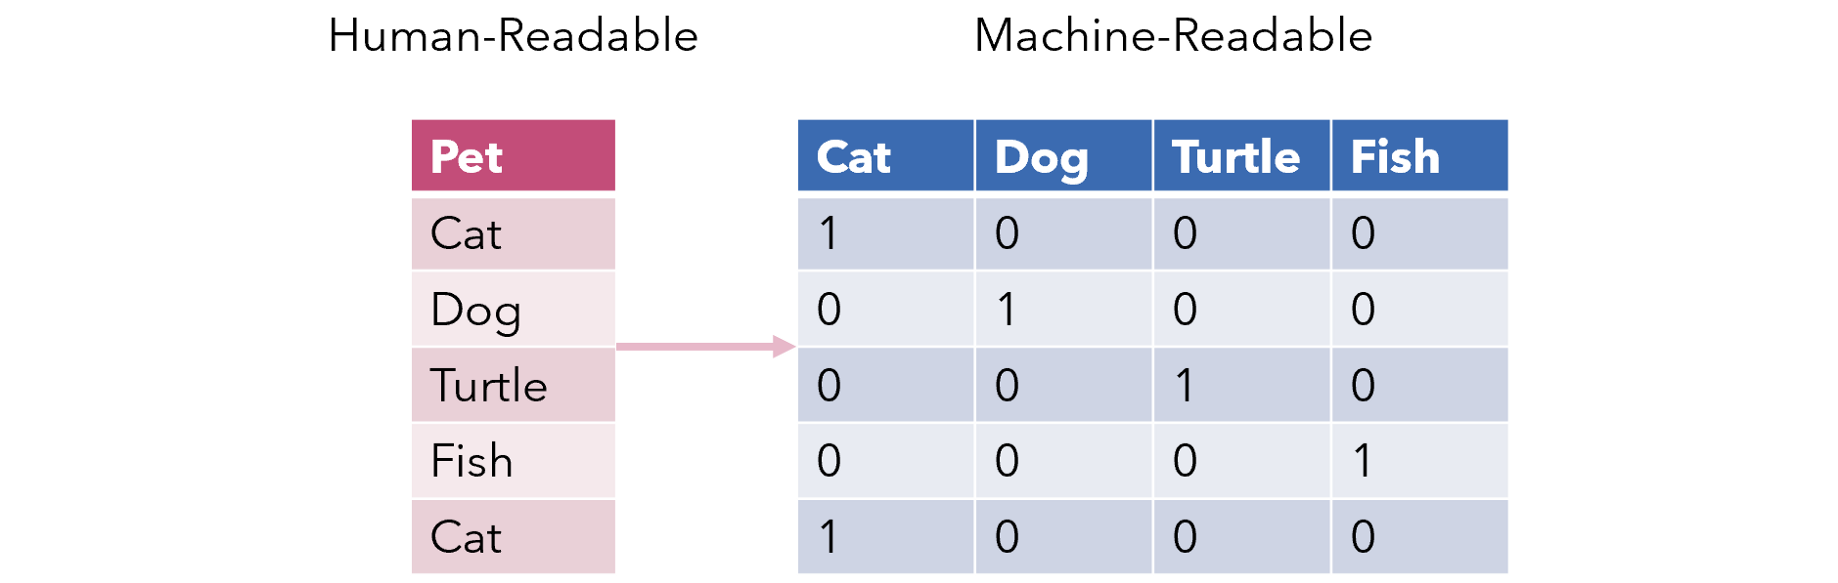

In [13]:
# select what is not binary or numerical

not_to_encode = to_binary + ['ring-number']

to_encode = [i for i in df.columns if i not in not_to_encode]

In [ ]:
# create a new dataframe for ML where the categorical columns are one-hot-encoded

df_ML = df[not_to_encode]
from sklearn import preprocessing
for col in to_encode:
  enc = preprocessing.OneHotEncoder()
  enc.fit(df[[col]])
  one_hot = enc.transform(df[[col]]).toarray()
  new_cols = [col + "_"+ i for i in enc.categories_[0]]
  df_ML[new_cols] = one_hot


In [15]:
df_ML

,class,bruises,gill-attachment,gill-spacing,gill-size,stalk-shape,ring-number,cap-shape_b,cap-shape_c,cap-shape_f,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,1,0,0,1,1,1,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,1,0,0,0,1,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0,1,0,0,0,1,1,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1,1,0,0,1,1,1,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,0,0,1,0,0,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,1,0,0,1,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8120,0,0,1,0,0,1,1,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8121,0,0,1,0,0,1,1,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8122,1,0,0,0,1,0,1,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,


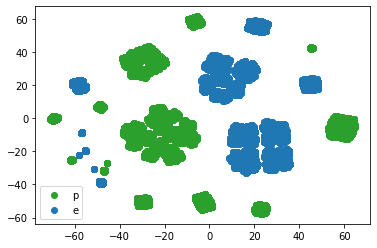

In [56]:
# quickly visualize data 
from sklearn.manifold import TSNE

#create model
model = TSNE(learning_rate = 100)

#fit model
x = df_ML[[i for i in df_ML.columns if 'class' not in i]]
y = df_ML['class']
transformed = model.fit_transform(x.values)
xs = transformed[:,0]
ys = transformed[:,1]
df_trans = pd.DataFrame({'xs':xs, 'ys':ys})

#create plots
plt.scatter(df_trans.loc[y==0]['xs'], df_trans.loc[y ==0]['ys'], c= 'tab:green')
plt.scatter(df_trans.loc[y ==1]['xs'], df_trans.loc[y ==1]['ys'], c= 'tab:blue')
plt.legend(loc ='lower left', labels = ['p', 'e'])

plt.show()
# plt.savefig('TSNE_mushrooms.svg')
# plt.savefig('TSNE_mushrooms.png')

## Exploratory data analysis

### Exercise

Plot:
* How many poisonous/edible mushrooms
* visualize the class separation of the features (plot each feature subdivided by class type - use sns.countplot with hue)
* Are there correlations between features? Which feature is mostly correlated with class?

Do not forget to add a plt.savefig('namefile.png') and plt.savefig('namefile.svg') at the end of each plot to save them.

## Split the dataset for test/train

In [16]:

#creating test/train split
#scaling not necessary
y=df_ML['class']
X=df_ML.drop(['class'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2022)
df_train, df_test = train_test_split(df_ML, test_size = 0.20, random_state=2022)

## Logistic regression

In [17]:

#logreg model
model = LogisticRegression().fit(X_train,y_train)


In [19]:
from sklearn.metrics import accuracy_score,precision_score

y_pred = model.predict(X_train)

print('Accuracy Score : ' + str(accuracy_score(y_train,y_pred)))
print('Precision Score : ' + str(precision_score(y_train,y_pred)))


#Logistic Regression Classifier Confusion matrix
from sklearn.metrics import confusion_matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_train,y_pred)))

Accuracy Score : 1.0
Precision Score : 1.0
Confusion Matrix : 
[[3387    0]
 [   0 3112]]


In [20]:

descriptors = []
y_pred = model.predict(X_test)
accuracy = 'Accuracy Score : ' + str(accuracy_score(y_test,y_pred))
precision ='Precision Score : ' + str(precision_score(y_test,y_pred))
print(accuracy)
print(precision)


#Logistic Regression Classifier Confusion matrix
from sklearn.metrics import confusion_matrix
cm = 'Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred))
print(cm)

descriptors = [accuracy, precision, cm]

Accuracy Score : 1.0
Precision Score : 1.0
Confusion Matrix : 
[[821   0]
 [  0 804]]


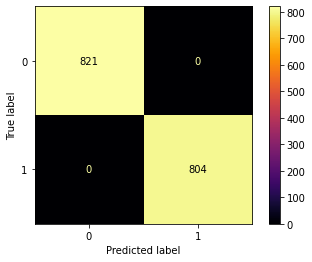

In [ ]:
plot_confusion_matrix(model,X_test,y_test,cmap='inferno',values_format='g')
#save file
plt.show()

In [21]:
# write the output somewhere

with open("descriptors_logistic_regression.txt", "w") as file:
    file_lines = "\n".join(descriptors)
    file.write(file_lines)



In [114]:
# save the coefficients
logistic_coef = LogisticRegression().fit(x,y).coef_.flatten()
coeff = [i for i in df_ML.columns if 'class' not in i]

dict_coef = dict(zip(coeff, logistic_coef))

import json

# Serialize data into file:
json.dump( dict_coef, open( "logistic_regression_coefficients.json", 'w' ) )


## Determining the most predictive features with Lasso regression

Lasso regression is a type of linear regression which is used to prevent overfitting of data by penalizing high linear coefficients. 

It also tends to **drop coefficients of unimportant variables to exactly zero**, which allows to identify the most important variables in high dimensional problems. 

Alpha is a parameter which sets the degree penalty for the covariate coefficients. The higher the alpha, the less sensitive Lasso will be to the data, the more variables coefficients will tend towards zero.


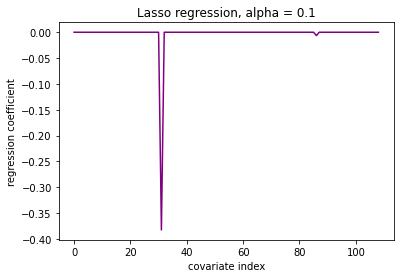

In [107]:
#import modules
from sklearn.linear_model import Lasso
x = df_ML[[i for i in df_ML.columns if 'class' not in i]]
y = df_ML['class']

#create model, set alpha
lasso = Lasso(alpha = 0.1)

#fit model, access coef_ attribute: lasso_coef
lasso_coef = lasso.fit(x,y).coef_

#create plot
plt.plot(range(len(x.columns)), lasso_coef, c='purple')
plt.title("Lasso regression, alpha = 0.1")
plt.xlabel('covariate index')
plt.ylabel('regression coefficient')

plt.show()

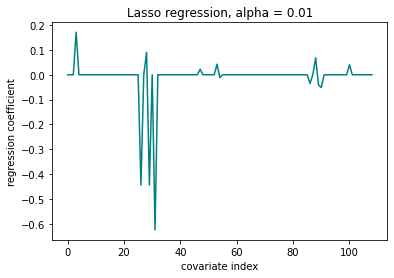

In [110]:
#create model, changre alpha
lasso = Lasso(alpha = 0.01)

#fit model, access coef_ attribute: lasso_coef
lasso_coef_01 = lasso.fit(x,y).coef_

#create plot
plt.plot(range(len(x.columns)), lasso_coef_01, c='teal')
plt.title("Lasso regression, alpha = 0.01")
plt.xlabel('covariate index')
plt.ylabel('regression coefficient')

plt.show()

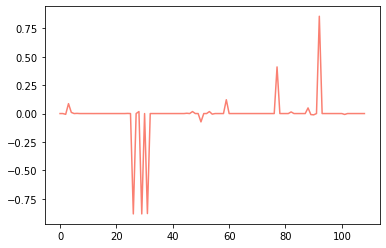

In [101]:
#create model, changre alpha
lasso = Lasso(alpha = 0.001)

#fit model, access coef_ attribute: lasso_coef
lasso_coef_001 = lasso.fit(x,y).coef_

#create plot
plt.plot(range(len(x.columns)), lasso_coef_001, c='salmon')
plt.title("Lasso regression, alpha = 0.001")
plt.xlabel('covariate index')
plt.ylabel('regression coefficient')

plt.show()

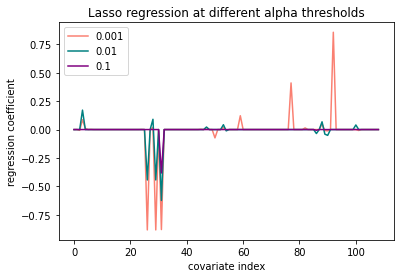

In [111]:
plt.plot(range(len(x.columns)), lasso_coef_001, label='0.001', c='salmon')
plt.plot(range(len(x.columns)), lasso_coef_01, label='0.01', c='teal')
plt.plot(range(len(x.columns)), lasso_coef, label='0.1', c='purple')

plt.title("Lasso regression at different alpha thresholds")
plt.xlabel('covariate index')
plt.ylabel('regression coefficient')

plt.legend()

plt.show()

In [102]:
# compare the lasso coefficient with the logistic regressionc coefficient
logistic_coef = LogisticRegression().fit(x,y).coef_

comparison_lasso_logistic = pd.DataFrame({'Lasso alpha 0.1' : lasso_coef.flatten(), 
                                          'Lasso alpha 0.01' : lasso_coef_01.flatten(),
                                          'Lasso alpha 0.001' : lasso_coef_001.flatten(),
                                          "Logistic": logistic_coef.flatten()}, index = [i for i in df_ML.columns if 'class' not in i])

In [103]:
comparison_lasso_logistic

,Lasso alpha 0.1,Lasso alpha 0.01,Lasso alpha 0.001,Logistic
bruises,-0.0,-0.000451,0.000000,0.145268
gill-attachment,-0.0,-0.000000,-0.000000,-0.242118
gill-spacing,-0.0,-0.000000,-0.006868,-2.330325
gill-size,0.0,0.171255,0.087160,3.322498
stalk-shape,0.0,0.000000,0.010095,1.223729
...,...,...,...,...
habitat_l,0.0,0.000000,0.000000,0.061946
habitat_m,-0.0,-0.000000,0.000000,0.745476
habitat_p,0.0,0.000000,-0.000000,-0.316959
habitat_u,0.0,0.000000,0.000000,0.409931


Text(0.5, 1.0, 'comparison between \nlogistic regression coefficients vs lasso coefficients at different alpha thresholds')

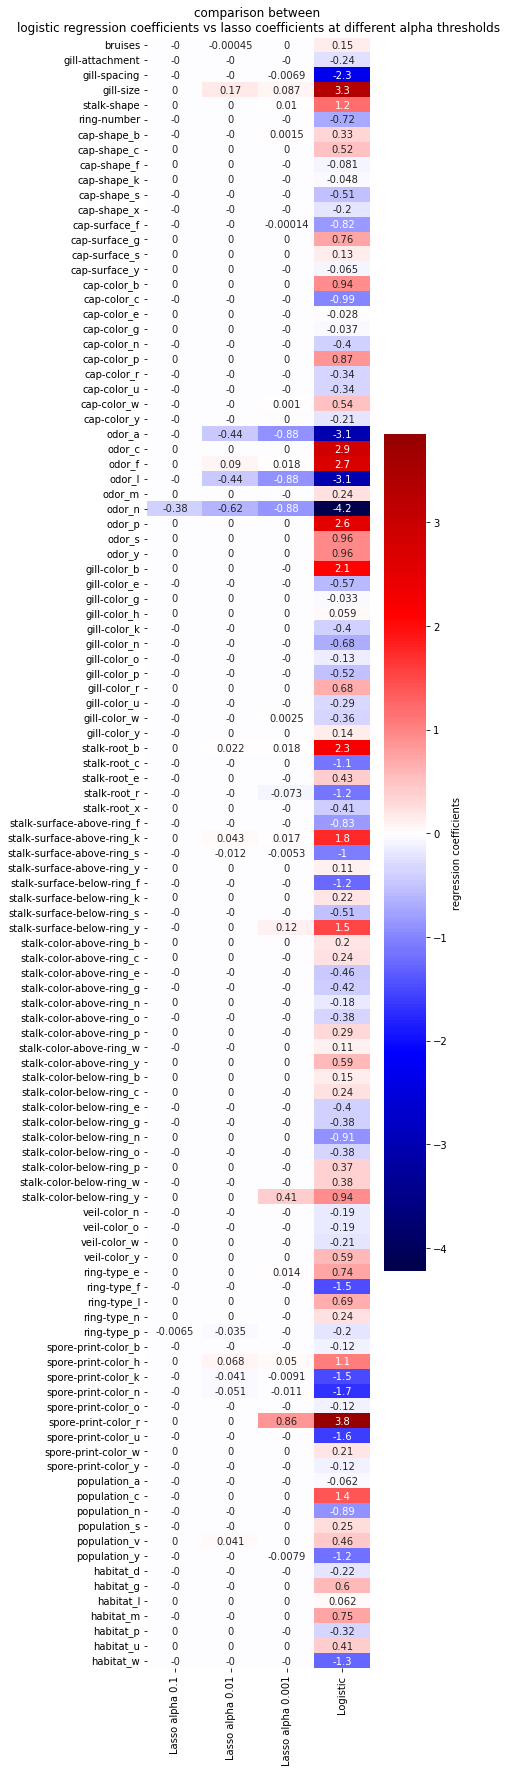

In [106]:
plt.figure(figsize = (5,30))
sns.heatmap(comparison_lasso_logistic, center=0, 
            annot=True, cmap="seismic", # choose a diverging colormap! #https://matplotlib.org/stable/tutorials/colors/colormaps.html
            cbar_kws={'label': 'regression coefficients'}) 
plt.title("comparison between \nlogistic regression coefficients vs lasso coefficients at different alpha thresholds")

What happens when we use statsmodels?

In [112]:
import statsmodels.api as sm

X_train_constant = sm.add_constant(X_train)
logit_mod = sm.Logit(y_train.values, X_train_constant)

logit_mod = logit_mod.fit()
logit_mod.summary()

# singular matrix means that the separation is complete

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/discrete/discrete_model.py:1736: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))


         Current function value: inf
         Iterations: 35


/usr/local/lib/python3.7/dist-packages/statsmodels/discrete/discrete_model.py:1789: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


LinAlgError: ignored

In [23]:
X_train_constant = sm.add_constant(X_train.iloc[:,0:9])
logit_mod = sm.Logit(y_train.values, X_train_constant)
logit_mod = logit_mod.fit()
logit_mod.summary()

         Current function value: 0.284034
         Iterations: 35


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                 6499
Model:                          Logit   Df Residuals:                     6489
Method:                           MLE   Df Model:                            9
Date:                Wed, 13 Apr 2022   Pseudo R-squ.:                  0.5897
Time:                        07:40:16   Log-Likelihood:                -1845.9
converged:                      False   LL-Null:                       -4498.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               2.3277      0.218     10.655      0.000       1.900       2.756
bruises            -3.5354      0.114    -30.886      0.000      -3.760      -3.311
gill-attachment    -4.3788      0.279    -15.679      0.000      -4.926      -3.831
gill-spacing       -4.7229      0.162    -29.127      0.000      -5.041      -4.405
gill-size           2.3558      0.123     19.183      0.000       2.115       2.596
stalk-shape         0.5512      0.104      5.311      0.000       0.348       0.755
ring-number        -0.7813      0.192     -4.074      0.000      -1.157      -0.405
cap-shape_b        -0.5926      0.212     -2.796      0.005      -1.008      -0.177
cap-shape_c        27.3069   8.91e+04      0.000      1.000   -1.75e+05    1.75e+05
cap-shape_f         0.2239      0.092      2.428      0.015       0.043       0.405
===================================================================================
"""

# Prepare a script to run the logistic regression model on Euler

1. Comment well what you are doing to be able to easily retrieve the errors
2.   Provide exact directories on the cluster for loading/saving data
3.   Load all the libraries upfront
4.   Test the script first (resetting the notebook) to avoid undefined variables





In [1]:
# load all the libraries you need upfront: If there are mistakes in loading, 
# you will not discover in the middle of the run

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score,precision_score
from sklearn import preprocessing
from sklearn.manifold import TSNE
from sklearn.metrics import confusion_matrix
import json



In [ ]:
# load the data
df= pd.read_csv('https://github.com/rashida048/Datasets/raw/master/mushrooms.csv')

In [ ]:
# prepare the data for ML
to_binary = [] 

for col in df.columns:

  # remove "?"
  if "?" in df[col].value_counts().index:
    print('convert ? values in column ', col)
    conditions = [df[col] == '?']
    choices = ['x']
    df[col] = np.select(conditions, choices, default = df[col])

  # reassign binary columns to 0,1
  elif len(df[col].value_counts()) == 2:
    print('convert this column into binary:', col)
    to_binary.append(col)
    options = list(df[col].value_counts().index)
    conditions = [df[col] == options[0], df[col] == options[1]]
    choices = [0,1]
    df[col] = np.select(conditions, choices)
    
  # drop columns with identical valuse
  elif len(df[col].value_counts()) < 2:
    print('drop this column:', col)
    df = df.drop(columns = [col])

# convert categorical into its corresponding numerical
conditions = [df['ring-number'] == 'n', df['ring-number'] == 'o', df['ring-number'] == 't']
choices = [0,1,2]
df['ring-number'] = np.select(conditions, choices)

# select what is not binary or numerical
not_to_encode = to_binary + ['ring-number']
to_encode = [i for i in df.columns if i not in not_to_encode]

# create a new dataframe for ML where the categorical columns are one-hot-encoded
df_ML = df[not_to_encode]

for col in to_encode:
  enc = preprocessing.OneHotEncoder()
  enc.fit(df[[col]])
  one_hot = enc.transform(df[[col]]).toarray()
  new_cols = [col + "_"+ i for i in enc.categories_[0]]
  df_ML[new_cols] = one_hot

In [ ]:
# quickly visualize data with TSNE
#create model
model = TSNE(learning_rate = 100)

#fit model
x = df_ML[[i for i in df_ML.columns if 'class' not in i]]
y = df_ML['class']
transformed = model.fit_transform(x.values)
xs = transformed[:,0]
ys = transformed[:,1]
df_trans = pd.DataFrame({'xs':xs, 'ys':ys})

#create plots
plt.scatter(df_trans.loc[y==0]['xs'], df_trans.loc[y ==0]['ys'], c= 'tab:green')
plt.scatter(df_trans.loc[y ==1]['xs'], df_trans.loc[y ==1]['ys'], c= 'tab:blue')
plt.legend(loc ='lower left', labels = ['p', 'e'])

#edit this!!

# plt.savefig('/cluster/home/username/exercise_dir/TSNE_mushrooms.svg')
# plt.savefig('/cluster/home/username/exercise_dir/TSNE_mushrooms.png')

In [ ]:
#creating test/train split
#scaling not necessary
y=df_ML['class']
X=df_ML.drop(['class'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2022)
df_train, df_test = train_test_split(df_ML, test_size = 0.20, random_state=2022)

In [ ]:
# train logreg model
model = LogisticRegression().fit(X_train,y_train)
y_pred = model.predict(X_train)

print('------ TRAINING DATASET ------')
print('Accuracy Score : ' + str(accuracy_score(y_train,y_pred)))
print('Precision Score : ' + str(precision_score(y_train,y_pred)))

#Logistic Regression Classifier Confusion matrix
print('Confusion Matrix : \n' + str(confusion_matrix(y_train,y_pred)))

# test model

descriptors = []
y_pred = model.predict(X_test)

print('------ TEST DATASET ------')
accuracy = 'Accuracy Score : ' + str(accuracy_score(y_test,y_pred))
precision ='Precision Score : ' + str(precision_score(y_test,y_pred))
print(accuracy)
print(precision)


#Logistic Regression Classifier Confusion matrix
cm = 'Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred))
print(cm)

# save the descriptors in a list
descriptors = [accuracy, precision, cm]

# write the output somewhere
# with open("/cluster/home/username/exercise_dir/descriptors_logistic_regression_predictions.txt", "w") as file:
#     file_lines = "\n".join(descriptors)
#     file.write(file_lines)


In [ ]:
plot_confusion_matrix(model,X_test,y_test,cmap='inferno',values_format='g')
# plt.savefig('/cluster/home/username/exercise_dir/confusion_matrix_test_dataset_predictions.svg')


In [ ]:
# save the coefficients
logistic_coef = LogisticRegression().fit(x,y).coef_.flatten()
coeff = [i for i in df_ML.columns if 'class' not in i]

dict_coef = dict(zip(coeff, logistic_coef))

# save data into file:
# json.dump( dict_coef, open( "/cluster/home/username/exercise_dir/logistic_regression_coefficients.json", 'w' ) )

Go to File >> Download >> Download .py
[script saved on your local computer]

Upload the script on Euler with:

```
scp username@euler.ethz.ch://location/of/files/on/euler/filenames /location/on/your/computer 
```

Install the appropriate libraries:


```
pip install pandas
pip install numpy
pip install matplotlib
pip install seaborn
pip install sklearn
pip install json

```
Run the script:


```
module load python
bsub "python /location/of/script/script.py"
```

Retrieve the data from Euler:


```
scp username@euler.ethz.ch://location/of/files/on/euler/* /location/on/your/computer
```


 


